In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import tweets_utils
import csv
import importlib
import seaborn as sns
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Data collection](#data_collection)
- [Hashtag study](#hashtag_study)
- [Users acitivty](#activity)
- [Urls study](#urls_study)
- [Correlation with conspiracy score](#conspiracy_score_suspended)
- [Profiles activity](#profiles_activity)

In [3]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/not_found/")
# issues = pd.read_csv(path[0] + "users_not_found.csv", low_memory=False, lineterminator="\n")
suspended = pd.read_csv(path[0] + "suspended_account.csv", low_memory=False, lineterminator="\n")
path =  glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
scores = pd.read_csv(path[0] + "sum_of_urls_df_all_months_with_score.csv", low_memory=False, lineterminator="\n")
df = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/df_suspended.csv", low_memory=False, lineterminator="\n")
rt_nt = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/rt_network/df_louvain.csv",
                    lineterminator="\n", low_memory=False)

In [4]:
rt_nt

,name,community
0,Huerconetzin,0
1,AnneKPIX,1
2,JustAnotherAme4,2
3,cnni,2
4,HHSRegion8,2
...,...,...
12513497,MokeDawg,238
12513498,WallChristie,83
12513499,StopEcocideNL,16
12513500,SueHealy16,120


In [11]:
suspended

,id,code,message,screen_name
0,2767590820,63,User has been suspended.,ConElMazoDando
1,887508829587488768,63,User has been suspended.,thehawk
2,1338073232,63,User has been suspended.,onenewsofficial
3,1147654506076725248,63,User has been suspended.,Ace135Q
4,250425415,63,User has been suspended.,chris19thws
...,...,...,...,...
9488,114299539,63,User has been suspended.,zaririha
9489,713873945439641600,63,User has been suspended.,missuniversal91
9490,997673205354577920,63,User has been suspended.,cutry6
9491,933447206,63,User has been suspended.,bloodtribeelect


In [12]:
list_name = suspended["screen_name"]

# Data collection
<a id="data_collection"/>

In [7]:
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [9]:
cols = ["id", "id_str", "user_id", "user_screen_name", "text","in_reply_to_status_id",
        "in_reply_to_status_id_str" ,"in_reply_to_user_id" ,"in_reply_to_user_id_str" ,"in_reply_to_screen_name",
        "rt_created_at", "rt_in_reply_to_status_id", "rt_in_reply_to_user_id", "rt_id", "rt_user_id", "rt_created_at",
        "rt_user_screen_name", "quoted_status_id" ,"quoted_status_text" ,"quoted_status_created_at", "quoted_user_id",
        "quoted_user_created_at", "hashtags", "user_mentions", "urls"]
df = pd.DataFrame()

In [14]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, True, list_name))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        df = df.append(lista[i]["df"])
        
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [13]:
df = df.reset_index(drop=True)
df

In [12]:
df.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/df_suspended.csv", 
          encoding='utf-8', index=False, line_terminator='\n')

# User activity
<a id="activity"/>

Number of total tweets: 97562
Number of original tweets: 24482
Number of retweets: 56138
Number of replies: 9272
Number of quotes: 7670
Number of original_tweets: 25.09% of total tweets
Number of retweets: 57.54% of total tweets
Number of replies: 9.5% of total tweets
Number of quotes: 7.86% of total tweets
Check sum == len(tweets):  True


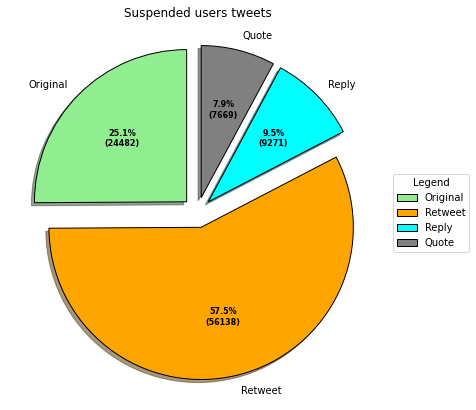

In [13]:
df_split = tweets_utils.split_df(df)
original = df_split["original"]
quote = df_split["quote"]
retweet = df_split["retweet"]
reply = df_split["reply"]
mentions = df_split["original_mention"]
reply_status = df_split['reply_to_status']
retweet_original = df_split['rt_original']
retweet_reply = df_split['rt_in_reply']
retweet_mention = df_split['rt_mention']
quote_original = df_split['quote_original']
quote_reply = df_split['quote_reply']
quote_mention = df_split['quote_mention']
total_len = len(df) 
len_quote = len(quote)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)
len_mentions = len(mentions)
len_reply_status = len(reply_status)
len_retweet_original = len(retweet_original)
len_retweet_reply = len(retweet_reply)
len_retweet_mention = len(retweet_mention)
len_quote_original = len(quote_original)
len_quote_reply = len(quote_reply)
len_quote_mention = len(quote_mention)
tweets_utils.stats(total_len, len_original, len_rt, len_rp, len_quote)
tweets_utils.print_pie_chart4("Suspended users tweets", "Original", "Retweet", "Reply", "Quote", len_original, len_rt, len_rp, len_quote)

# Hashtags study
<a id="hashtag_study"/>

In [14]:
hs = tweets_utils.hashtag_process(df)
list_covid_keyword = ["coronavirus", "covid19", "covid", "chinacoronavirus", "coronavirusoutbreak",
  "covid_19", "sarscov2", "covidー19", "wuhancoronavirus", "wuhan", "china", "coronoavirus", "coronaviruschina"]
list_1 = [item for item in hs if item.lower() not in list_covid_keyword]
# list_1

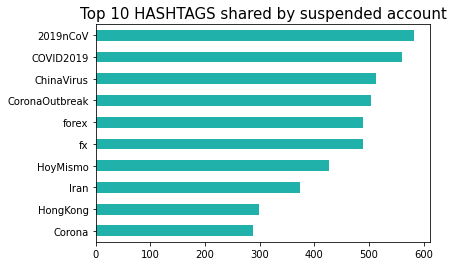

In [15]:
hs = pd.Series(list_1).value_counts().sort_values(ascending=False)
ax = hs[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 HASHTAGS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

# Urls study
<a id="urls_study"/>

In [20]:
# urls = df["urls"]
# urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in urls]
# urls = list(filter(lambda num: num != "0", urls))
# urls = tweets_utils.remove_www(urls)
# urls = pd.Series(urls).value_counts().sort_values(ascending=False)
# urls

In [18]:
# fig = plt.figure(figsize=(14, 8))
# ax = urls[:10].plot(kind='barh', color='green', fig=(14,14)) #green #steelblue
# ax.set_title('Top 10 URLS shared by suspended account', fontsize=15)
# ax.invert_yaxis()
# plt.show()

### Correlation with conspiracy score
<a id="conspiracy_score_suspended"/>

In [6]:
scores

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,montanaro_debra,2.0,0.0,1.0,0.0,1.0,1.0
1,Kranti13496321,8.0,0.0,1.0,2.0,5.0,1.0
2,ItsBurnerSzn,3.0,0.0,1.0,1.0,1.0,1.0
3,z_watching,1.0,0.0,1.0,0.0,0.0,1.0
4,hollafodollaz,2.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
5357056,JorgeATrinidad1,0.0,0.0,0.0,0.0,0.0,NaN
5357057,RegulationsBot,0.0,0.0,0.0,0.0,0.0,NaN
5357058,sakaryagazetesi,0.0,0.0,0.0,0.0,0.0,NaN
5357059,jorgeul,0.0,0.0,0.0,0.0,0.0,NaN


In [14]:
suspended_score = suspended.merge(scores, left_on="screen_name", right_on="user_screen_name",
                                 how="left")
suspended_score.drop("user_screen_name", axis=1, inplace=True)

In [15]:
suspended_score

,id,code,message,screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,2767590820,63,User has been suspended.,ConElMazoDando,895.0,0.0,0.0,894.0,1.0,NaN
1,887508829587488768,63,User has been suspended.,thehawk,512.0,0.0,0.0,512.0,0.0,NaN
2,1338073232,63,User has been suspended.,onenewsofficial,350.0,0.0,0.0,124.0,226.0,NaN
3,1147654506076725248,63,User has been suspended.,Ace135Q,315.0,5.0,5.0,303.0,2.0,0.50
4,250425415,63,User has been suspended.,chris19thws,495.0,0.0,0.0,495.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9488,114299539,63,User has been suspended.,zaririha,5.0,0.0,0.0,1.0,4.0,NaN
9489,713873945439641600,63,User has been suspended.,missuniversal91,1.0,0.0,0.0,0.0,1.0,NaN
9490,997673205354577920,63,User has been suspended.,cutry6,234.0,113.0,2.0,97.0,22.0,0.02
9491,933447206,63,User has been suspended.,bloodtribeelect,74.0,19.0,2.0,30.0,23.0,0.10


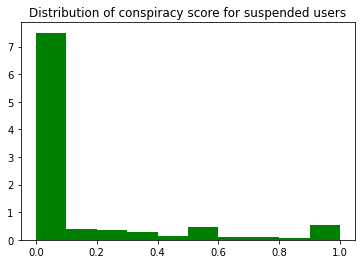

In [11]:
plt.hist(suspended_score["conspiracy_score"], 10,
         color="green", density=True, stacked=True)
plt.title("Distribution of conspiracy score for suspended users")
# plt.yscale('log', nonposy='clip')
plt.show()

In [12]:
rt_nt

,name,community
0,Huerconetzin,0
1,AnneKPIX,1
2,JustAnotherAme4,2
3,cnni,2
4,HHSRegion8,2
...,...,...
12513497,MokeDawg,238
12513498,WallChristie,83
12513499,StopEcocideNL,16
12513500,SueHealy16,120


In [16]:
suspended_score_comm = suspended_score.merge(rt_nt, left_on="screen_name", right_on="name",
                                             how="left")
suspended_score_comm

,id,code,message,screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,name,community
0,2767590820,63,User has been suspended.,ConElMazoDando,895.0,0.0,0.0,894.0,1.0,NaN,ConElMazoDando,0.0
1,887508829587488768,63,User has been suspended.,thehawk,512.0,0.0,0.0,512.0,0.0,NaN,thehawk,6.0
2,1338073232,63,User has been suspended.,onenewsofficial,350.0,0.0,0.0,124.0,226.0,NaN,onenewsofficial,9.0
3,1147654506076725248,63,User has been suspended.,Ace135Q,315.0,5.0,5.0,303.0,2.0,0.50,Ace135Q,2.0
4,250425415,63,User has been suspended.,chris19thws,495.0,0.0,0.0,495.0,0.0,NaN,chris19thws,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9488,114299539,63,User has been suspended.,zaririha,5.0,0.0,0.0,1.0,4.0,NaN,zaririha,14.0
9489,713873945439641600,63,User has been suspended.,missuniversal91,1.0,0.0,0.0,0.0,1.0,NaN,missuniversal91,5.0
9490,997673205354577920,63,User has been suspended.,cutry6,234.0,113.0,2.0,97.0,22.0,0.02,cutry6,2.0
9491,933447206,63,User has been suspended.,bloodtribeelect,74.0,19.0,2.0,30.0,23.0,0.10,bloodtribeelect,1.0


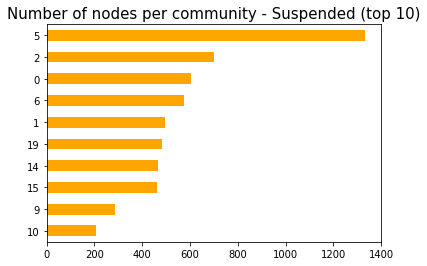

le prime 5 subcommunities sono il 78.86% del totale nella network
il numero di utenti è 7128


In [20]:
comm = suspended_score_comm["community"].value_counts().sort_values(ascending=False)
comm = comm.rename(lambda x: int(x))

ax = comm[:10].plot(kind='barh', color='orange') 
ax.set_title('Number of nodes per community - Suspended (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:10]:
    s = s + i 
print(f"le prime 5 subcommunities sono il {round(s/comm.sum()*100,2)}% del totale nella network")
print(f"il numero di utenti è {comm.sum()}")

In [21]:
good_rt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/to_be_scored/good_rt.csv")
bad_rt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/to_be_scored/bad_rt.csv")
same_rt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/to_be_scored/same_rt.csv")

In [28]:
lst = []
[lst.append("good") for i in good_rt["user_screen_name"]]
good_rt["dozen"] = lst
lst = []
[lst.append("bad") for i in bad_rt["user_screen_name"]]
bad_rt["dozen"] = lst
lst = []
[lst.append("same") for i in same_rt["user_screen_name"]]
same_rt["dozen"] = lst
lst = []
x = good_rt.append(bad_rt)
x = x.append(same_rt)
x.reset_index(drop=True)

,user_screen_name,dozen
0,DrDenaGrayson,good
1,Boscardin,good
2,yoksig,good
3,RoyBrowm,good
4,gfkw47,good
...,...,...
207369,tompaine44,same
207370,pianotinkler,same
207371,BOLG8TR,same
207372,GovPickledick,same


In [30]:
suspended_score_comm.drop("name", axis=1, inplace=True)

In [31]:
suspended_score_comm_dozen = suspended_score_comm.merge(x, left_on="screen_name",
                               right_on="user_screen_name", how="left")

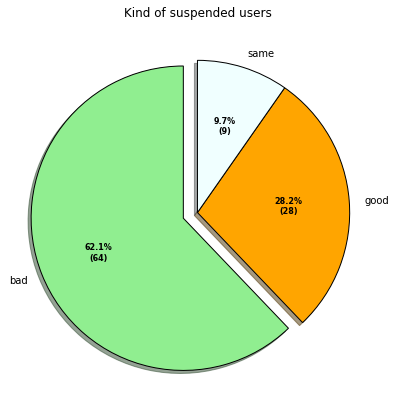

In [37]:
x = suspended_score_comm_dozen[suspended_score_comm_dozen["dozen"].notna()]
x = x["dozen"].value_counts().sort_values(ascending=False)
data = x
label = x.index
explode = (0.1, 0, 0)
# Creating color parameters
colors = ( "lightgreen", "orange", "azure", "yellow")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp)

# # Adding legend
# ax.legend(wedges, label,
#           title ="Legend",
#           loc ="center left",
#           bbox_to_anchor =(1, 0.3, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Kind of suspended users")
plt.show()